## 1. Data collection

In [1]:
# Importing potential libraries
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

### Data from Nigeria Center for Diseases Control

In [2]:
# Scraping data from the NCDC website
ncdc_url = 'https://covid19.ncdc.gov.ng/'
response = requests.get(ncdc_url)

In [3]:
# Fetching the content of the page
content = response.text

In [4]:
# Parsing the html content
soup = BeautifulSoup(content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
 <head>
  <title>
   NCDC Coronavirus COVID-19 Microsite
  </title>
  <!--[if lt IE 11]>
    	<script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
    	<script src="https://oss.maxcdn.com/libs/respond.js/1.4.2/respond.min.js"></script>
    	<![endif]-->
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, user-scalable=0, minimal-ui" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible">
   <meta content="" name="description">
    <meta content="" name="keywords"/>
    <meta content="Codedthemes" name="author">
     <!-- Google Tag Manager -->
     <script>
      (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id

In [5]:
# accessing the confirmed cases table
# Date - 24/05/2021
table = soup.find('div', {'class':'col-xl-7'})
theaders = []
for th in table.find_all('th'):
    theaders.append(th.text.replace('\n', ' ').strip())
print('Table headers:', theaders)
# Getting all rows
table_rows = []
for tr in table.tbody.find_all('tr'):
    t_row = {}
    for td, th in zip(tr.find_all('td'), theaders):
        t_row[th] = td.text.replace('\n', '').strip()
    table_rows.append(t_row)
# Creating a csv file for the table
with open('ConfirmedCasesByStatesNg.csv', 'w', newline='') as output:
    headers = theaders
    writer = csv.DictWriter(output, headers)
    writer.writeheader()
    for row in table_rows:
        if row:
            writer.writerow(row)

Table headers: ['States Affected', 'No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']


In [6]:
covid_Ng = pd.read_csv('ConfirmedCasesByStatesNg.csv')

### Data from John Hopkins Repository

In [7]:
#Global Daily confirmed cases - 24/05/2021
url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed = pd.read_csv(url, index_col='Country/Region')

#This index formatting method is used to have a cleaner, and a better labelled dataset.

In [9]:
df_confirmed.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441


In [10]:
df_confirmed.shape

(275, 491)

In [11]:
#Global Daily recovered cases - 24/05/2021
url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_recovered = pd.read_csv(url, index_col='Country/Region')

In [12]:
df_recovered.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,54634,54663,54686,55010,55118,55529,55687,55790,55889,56035
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,122105,123081,124312,125419,126405,127240,127869,128425,128601,128732
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,87137,87251,87359,87476,87609,87746,87902,88066,88208,88346
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,13155,13155,13155,13211,13234,13234,13234,13234,13234,13234
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,25650,25703,25715,25995,26013,26458,26483,26513,26775,26778


In [13]:
#Global daily death cases - 24/05/2021
url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths = pd.read_csv(url, index_col='Country/Region')

In [14]:
df_deaths.tail()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Vietnam,NaN,14.058324,108.277199,0,0,0,0,0,0,0,...,35,36,37,37,37,37,39,41,42,43
West Bank and Gaza,NaN,31.952200,35.233200,0,0,0,0,0,0,0,...,3401,3423,3428,3437,3437,3448,3448,3452,3459,3459
Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,0,...,1285,1285,1289,1294,1297,1298,1301,1302,1304,1307
Zambia,NaN,-13.133897,27.849332,0,0,0,0,0,0,0,...,1260,1260,1260,1261,1263,1263,1265,1266,1267,1268
Zimbabwe,NaN,-19.015438,29.154857,0,0,0,0,0,0,0,...,1582,1582,1582,1582,1583,1583,1585,1586,1586,1586


### Loading external data into dataframe

In [15]:
covid_external = pd.read_csv('covid_external.csv')
covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [16]:
budget_data = pd.read_csv('budget data.csv')
budget_data.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [17]:
realGDP = pd.read_csv('RealGDP.csv')
realGDP.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [18]:
covid_Ng.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"58,871","1,442","56,990",439
1,FCT,"19,852",580,"19,106",166
2,Kaduna,"9,070",3,"9,002",65
3,Plateau,"9,061",2,"9,002",57
4,Rivers,"7,227",78,"7,048",101


## 2. Data Exploration

In [19]:
covid_Ng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [20]:
covid_Ng.isnull().sum()

States Affected                 0
No. of Cases (Lab Confirmed)    0
No. of Cases (on admission)     0
No. Discharged                  0
No. of Deaths                   0
dtype: int64

In [21]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, Afghanistan to Zimbabwe
Columns: 491 entries, Province/State to 5/23/21
dtypes: float64(2), int64(488), object(1)
memory usage: 1.0+ MB


In [22]:
df_confirmed.isnull().sum()

Province/State    189
Lat                 2
Long                2
1/22/20             0
1/23/20             0
                 ... 
5/19/21             0
5/20/21             0
5/21/21             0
5/22/21             0
5/23/21             0
Length: 491, dtype: int64

In [23]:
df_recovered.isnull().sum()

Province/State    190
Lat                 1
Long                1
1/22/20             0
1/23/20             0
                 ... 
5/19/21             0
5/20/21             0
5/21/21             0
5/22/21             0
5/23/21             0
Length: 491, dtype: int64

In [24]:
df_recovered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, Afghanistan to Zimbabwe
Columns: 491 entries, Province/State to 5/23/21
dtypes: float64(2), int64(488), object(1)
memory usage: 999.4+ KB


In [25]:
df_deaths.isnull().sum()

Province/State    189
Lat                 2
Long                2
1/22/20             0
1/23/20             0
                 ... 
5/19/21             0
5/20/21             0
5/21/21             0
5/22/21             0
5/23/21             0
Length: 491, dtype: int64

In [26]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, Afghanistan to Zimbabwe
Columns: 491 entries, Province/State to 5/23/21
dtypes: float64(2), int64(488), object(1)
memory usage: 1.0+ MB


In [27]:
covid_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [28]:
realGDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [29]:
budget_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


The datasets have no missing values that could affect analysis.

## 3. Data cleaning

All data obtained from the John Hopkins repository have an acceptable datatype for each column. Each date has numbers of cases (int), the latitudes and longitudes are in decimals (float), and the states and countries are objects(strings).

In [31]:
covid_Ng = pd.read_csv('ConfirmedCasesByStatesNg.csv')
covid_Ng.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"58,871","1,442","56,990",439
1,FCT,"19,852",580,"19,106",166
2,Kaduna,"9,070",3,"9,002",65
3,Plateau,"9,061",2,"9,002",57
4,Rivers,"7,227",78,"7,048",101


In [32]:
# converting column data from object to integer
covid_Ng['No. of Cases (Lab Confirmed)'] = covid_Ng['No. of Cases (Lab Confirmed)'].str.replace(',', '').astype(str).astype(int)

In [33]:
covid_Ng['No. of Cases (on admission)'] = covid_Ng['No. of Cases (on admission)'].str.replace(',', '').astype(str).astype(int)

In [34]:
covid_Ng['No. Discharged'] = covid_Ng['No. Discharged'].str.replace(',', '').astype(str).astype(int)

In [35]:
covid_Ng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     int32 
 3   No. Discharged                37 non-null     int32 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int32(3), int64(1), object(1)
memory usage: 1.1+ KB


This shows that the NCDC data has been converted to an acceptable and analyzable format - all cases records as now integers.
Every other dataset has appropriate datatype for respective columns.

### Extracting daily data for Nigeria from the global cases repository

In [36]:
NgDailyConfirmed = df_confirmed[df_confirmed['Lat'] == 9.082]

In [37]:
# Dataframe for daily confirmed cases in nigeria
NgDailyConfirmed

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Nigeria,NaN,9.082,8.6753,0,0,0,0,0,0,0,...,165661,165702,165709,165778,165778,165852,165901,165944,165979,166019


In [38]:
# Dataframe for daily recoverd cases in Nigeria
NgDailyRecovered = df_recovered[df_recovered['Lat'] == 9.082]
NgDailyRecovered

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Nigeria,NaN,9.082,8.6753,0,0,0,0,0,0,0,...,156399,156412,156413,156415,156415,156456,156459,156462,156468,156476


In [39]:
# Dataframe for dailt deaths in Nigeria
NgDailyDeaths = df_deaths[df_deaths['Lat'] == 9.082]
NgDailyDeaths

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Nigeria,NaN,9.082,8.6753,0,0,0,0,0,0,0,...,2066,2066,2066,2067,2067,2067,2067,2067,2067,2067


## 4. Analysis

<AxesSubplot:xlabel='States Affected'>

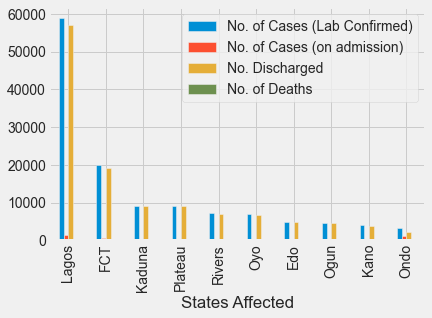

In [40]:
covid_Ng.nlargest(10, ['No. of Cases (Lab Confirmed)']).plot.bar(x='States Affected')

<AxesSubplot:title={'center':'Top 10 states with Lab Confirmed Cases'}, xlabel='States Affected'>

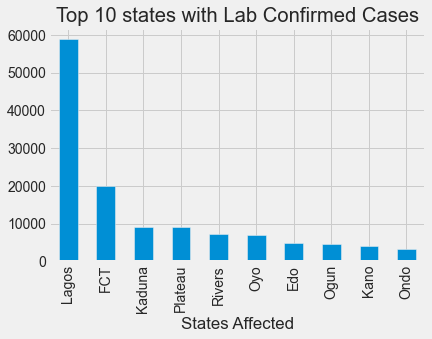

In [41]:
covid_Ng[['States Affected', 'No. of Cases (Lab Confirmed)']].sort_values(by='No. of Cases (Lab Confirmed)', ascending=False).head(10).plot.bar(title='Top 10 states with Lab Confirmed Cases', x='States Affected', legend=False)

<AxesSubplot:title={'center':'Top 10 states with Discharged Cases'}, xlabel='States Affected'>

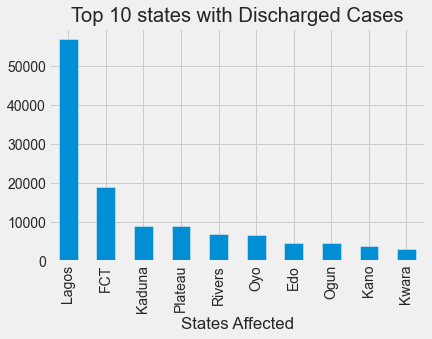

In [42]:
covid_Ng[['States Affected', 'No. Discharged']].sort_values(by='No. Discharged', ascending=False).head(10).plot.bar(title='Top 10 states with Discharged Cases', x='States Affected', legend=False)

In [43]:
covid_Ng.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,58871,1442,56990,439
1,FCT,19852,580,19106,166
2,Kaduna,9070,3,9002,65
3,Plateau,9061,2,9002,57
4,Rivers,7227,78,7048,101


<AxesSubplot:title={'center':'Top 10 States By No. of Death'}, xlabel='States Affected'>

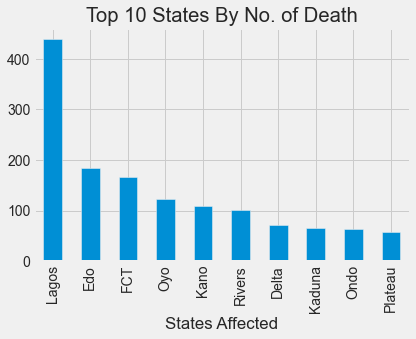

In [44]:
covid_Ng[['States Affected', 'No. of Deaths']].sort_values(by='No. of Deaths', ascending=False).head(10).plot.bar(title='Top 10 States By No. of Death', x='States Affected', legend=False)

In [45]:
df_NgDaily = pd.concat([NgDailyConfirmed, NgDailyRecovered, NgDailyDeaths], ignore_index=True)

<AxesSubplot:title={'center':'Combined Covid cases relationship'}, xlabel='Dates', ylabel='Number'>

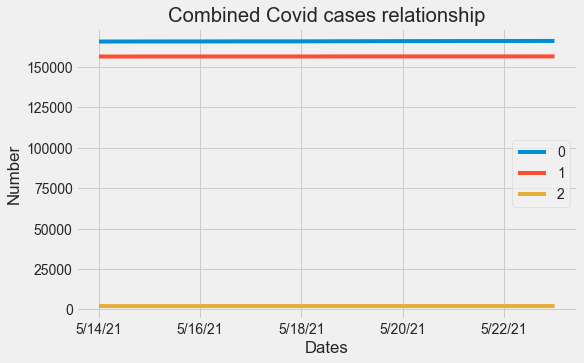

In [46]:
df_NgDaily.T.tail(10).plot(xlabel='Dates', ylabel='Number', figsize=(8,5), title='Combined Covid cases relationship')

0-Confirmed cases
1-Recovered cases
2-Death cases
This is however not a clear representation dataset relationship. 

<AxesSubplot:title={'center':'Trend of daily Death cases in Nigeria'}, xlabel='Dates of Record', ylabel='Number of cases'>

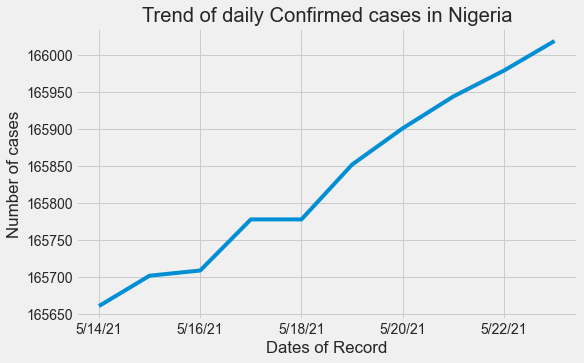

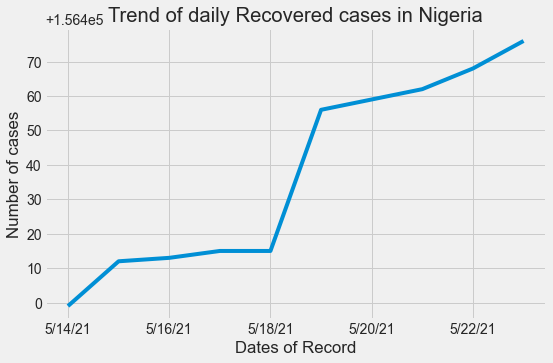

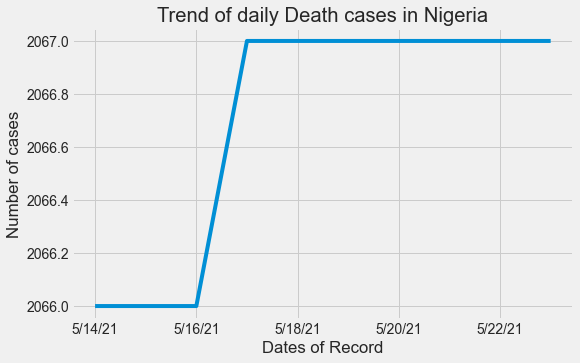

In [47]:
NgDailyConfirmed.T.tail(10).plot(title='Trend of daily Confirmed cases in Nigeria', legend=False, xlabel='Dates of Record', ylabel='Number of cases', figsize=(8, 5))
NgDailyRecovered.T.tail(10).plot(title='Trend of daily Recovered cases in Nigeria', legend=False, xlabel='Dates of Record', ylabel='Number of cases', figsize=(8, 5))
NgDailyDeaths.T.tail(10).plot(title='Trend of daily Death cases in Nigeria', legend=False, xlabel='Dates of Record', ylabel='Number of cases', figsize=(8, 5))

In [48]:
# Displaying a transposed view of the concatenated nigerian dataset (most recent) extracted from the repository data,
#  with the rate of increase/decrease of infection, recovery and death, respectively.
df_NgDaily.T.tail(10).diff()

,0,1,2
5/14/21,NaN,NaN,NaN
5/15/21,41,13,0
5/16/21,7,1,0
5/17/21,69,2,1
5/18/21,0,0,0
5/19/21,74,41,0
5/20/21,49,3,0
5/21/21,43,3,0
5/22/21,35,6,0
5/23/21,40,8,0


<AxesSubplot:title={'center':'Change in confirmed cases over 30 Days'}, xlabel='Dates', ylabel='Increase/Decrease'>

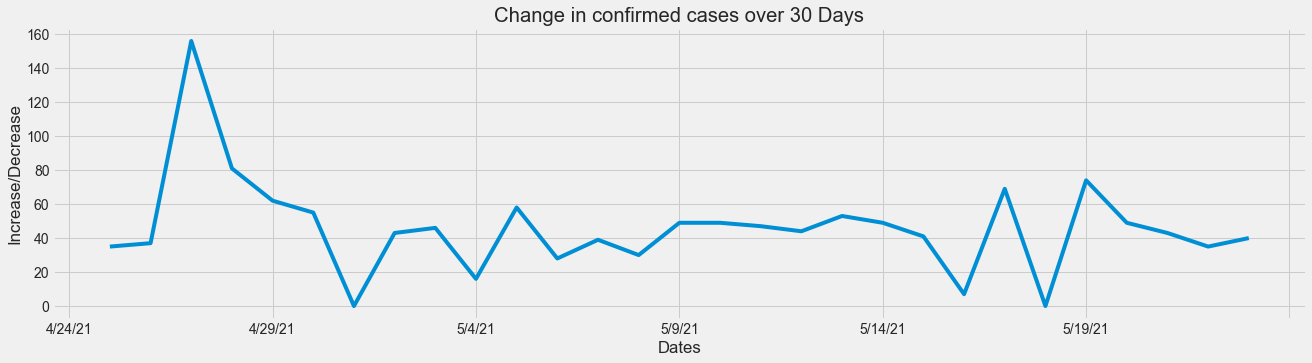

In [49]:
NgDailyConfirmed.T.tail(30).diff().plot(xlabel='Dates', ylabel='Increase/Decrease', figsize=(20, 5), legend=False, title='Change in confirmed cases over 30 Days')

<AxesSubplot:title={'center':'Percentage Change in Infection Rate'}, xlabel='Dates', ylabel='Increase/Decrease'>

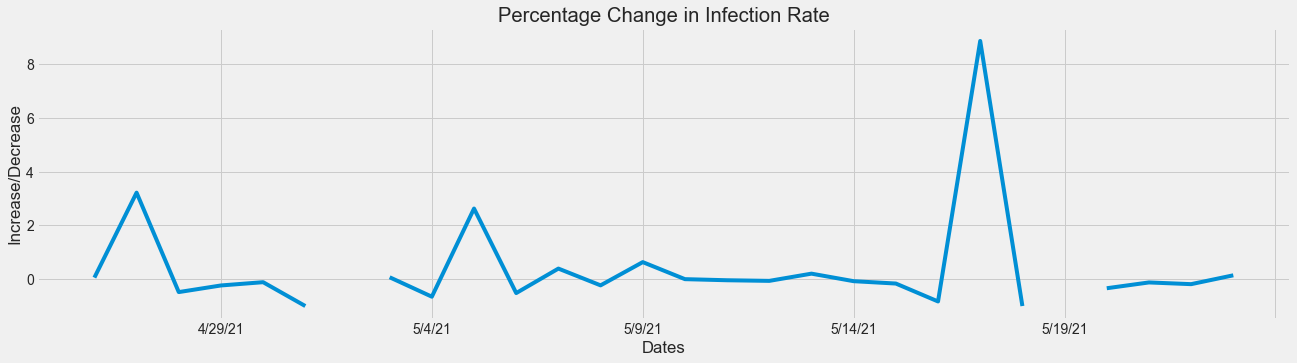

In [50]:
NgDailyConfirmed.T.tail(30).diff().pct_change().plot(xlabel='Dates', ylabel='Increase/Decrease', figsize=(20, 5), legend=False, title='Percentage Change in Infection Rate')

This plot shows the rate of daily infection in Nigeria over the past 30 days till date(24/05/2021).
#### From the graphs above, 27th of April, 2021 has the highest infection over the past 30 days, at 300+% increase compared to the previous and following dates.

<AxesSubplot:title={'center':'Change in Recovery'}, xlabel='Dates', ylabel='Increase/Decrease'>

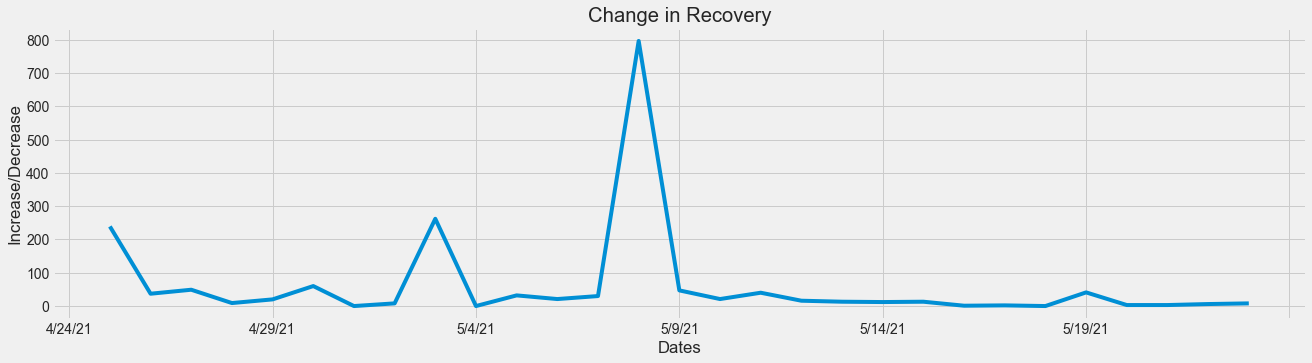

In [51]:
NgDailyRecovered.T.tail(30).diff().plot(xlabel='Dates', ylabel='Increase/Decrease', figsize=(20, 5), legend=False, title='Change in Recovery')

<AxesSubplot:title={'center':'Percentage Change in Recovery Rate'}, xlabel='Dates', ylabel='Increase/Decrease'>

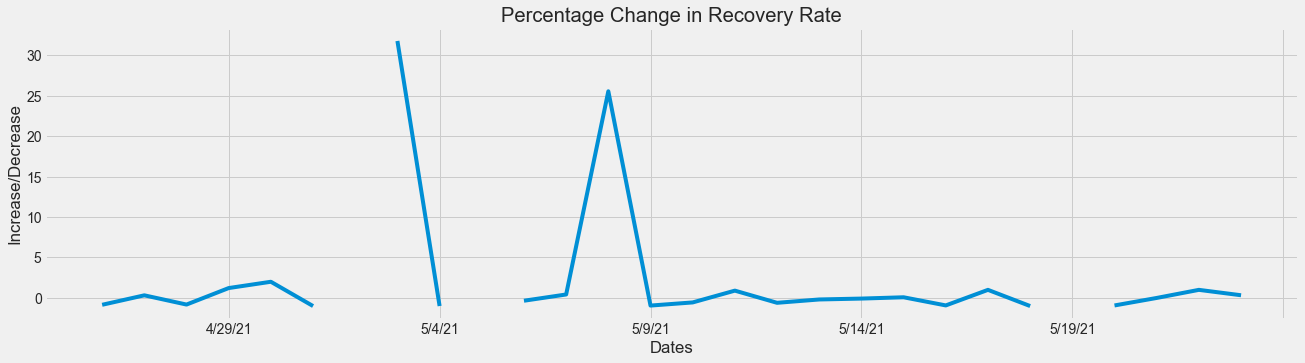

In [52]:
NgDailyRecovered.T.tail(30).diff().pct_change().plot(xlabel='Dates', ylabel='Increase/Decrease', figsize=(20, 5), legend=False, title='Percentage Change in Recovery Rate')

<AxesSubplot:title={'center':'Change in Deaths, Ng'}, xlabel='Dates', ylabel='Increase/Decrease'>

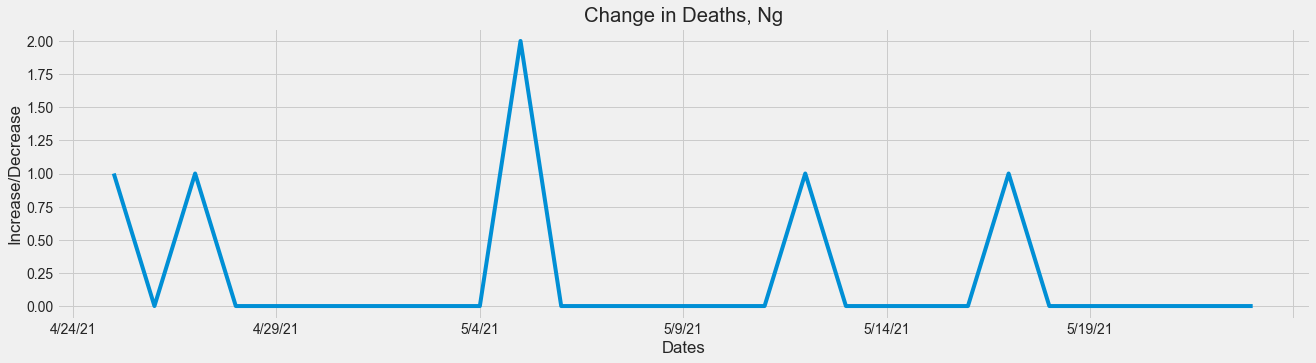

In [53]:
NgDailyDeaths.T.tail(30).diff().plot(xlabel='Dates', ylabel='Increase/Decrease', figsize=(20, 5), legend=False, title='Change in Deaths, Ng')

In [56]:
covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [57]:
# Changing the index of the NCDC dataset for easy merging with the external dataset
# covid_Ng.index = covid_Ng['States Affected']
# del covid_Ng['States Affected']
covid_Ng.head()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
States Affected,,,,
Lagos,58871,1442,56990,439
FCT,19852,580,19106,166
Kaduna,9070,3,9002,65
Plateau,9061,2,9002,57
Rivers,7227,78,7048,101


In [58]:
ex = covid_external.set_index('states').join(covid_Ng)
ex.head()

,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
states,,,,,,,,,,,,,,,
FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,19852.0,580.0,19106.0,166.0
Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,9061.0,2.0,9002.0,57.0
Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93,3123.0,1.0,3067.0,55.0
Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85,NaN,NaN,NaN,NaN
Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84,935.0,5.0,913.0,17.0


In [59]:
Top10ByConfirmedCases = ex.nlargest(10, ['No. of Cases (Lab Confirmed)'])
Top10ByConfirmedCases.head()

,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
states,,,,,,,,,,,,,,,
Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,58871.0,1442.0,56990.0,439.0
FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,19852.0,580.0,19106.0,166.0
Kaduna,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86,9070.0,3.0,9002.0,65.0
Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,9061.0,2.0,9002.0,57.0
Rivers,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00,7227.0,78.0,7048.0,101.0


<AxesSubplot:label='a99fcd60-7e4d-40bd-b4da-dbdefff0461d'>

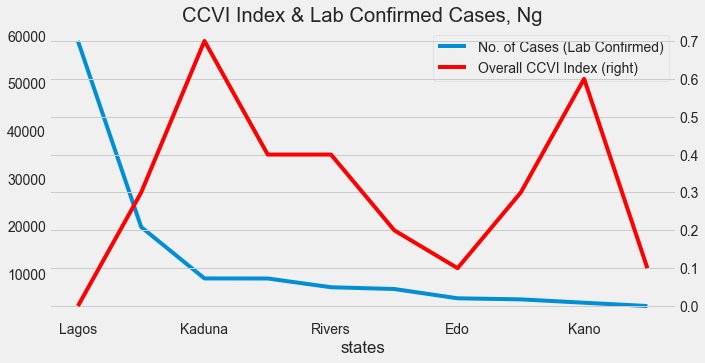

In [60]:
ax = Top10ByConfirmedCases[['No. of Cases (Lab Confirmed)']].plot()
Top10ByConfirmedCases[['Overall CCVI Index']].plot(style='r', ax=ax, secondary_y=True, figsize=(10, 5), title='CCVI Index & Lab Confirmed Cases, Ng')

The above graph shows vulnerablity index has little relationship with the number of lab confirmed cases, as there is no linear relationship.
For instance, Lagos state with the highest number of cases experienced a lower impact compared to Kaduna whose cases are more than 5 times smaller than Lagos.

<AxesSubplot:label='063b7e17-dc1b-4db0-b9a5-1b16e99096fd'>

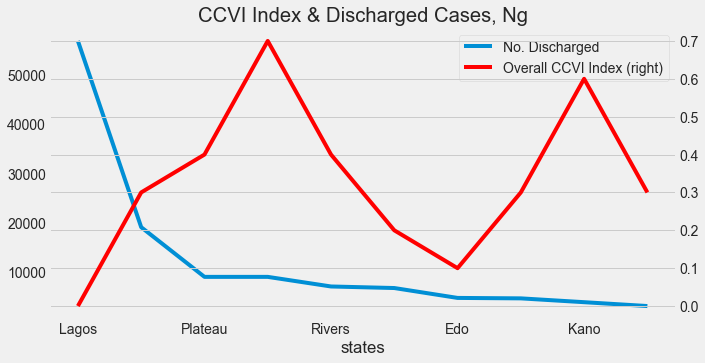

In [62]:
Top10ByDischarge = ex.nlargest(10, ['No. Discharged'])
ax = Top10ByDischarge[['No. Discharged']].plot()
Top10ByDischarge[['Overall CCVI Index']].plot(style='r', ax=ax, secondary_y=True, figsize=(10, 5), title='CCVI Index & Discharged Cases, Ng')

<AxesSubplot:label='890c2437-332d-4c15-9d91-711c6fdab911'>

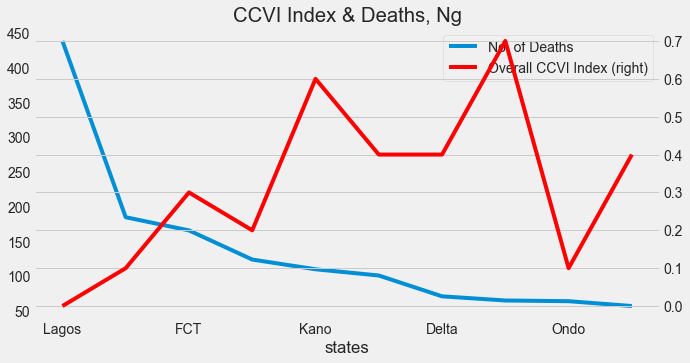

In [63]:
Top10ByDeath = ex.nlargest(10, ['No. of Deaths'])
ax = Top10ByDeath[['No. of Deaths']].plot()
Top10ByDeath[['Overall CCVI Index']].plot(style='r', ax=ax, secondary_y=True, figsize=(10, 5), title='CCVI Index & Deaths, Ng')

In [64]:
realGDP

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [65]:
RealGDP = pd.melt(realGDP, 'Year', var_name='Quarter')

<AxesSubplot:xlabel='Population Density', ylabel='No. of Cases (Lab Confirmed)'>

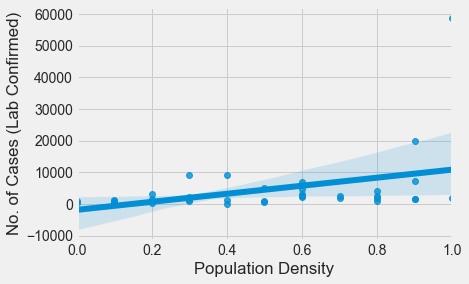

In [66]:
# Relationship between population density and the confirmed cases
sns.regplot(y='No. of Cases (Lab Confirmed)', x='Population Density', data=ex)

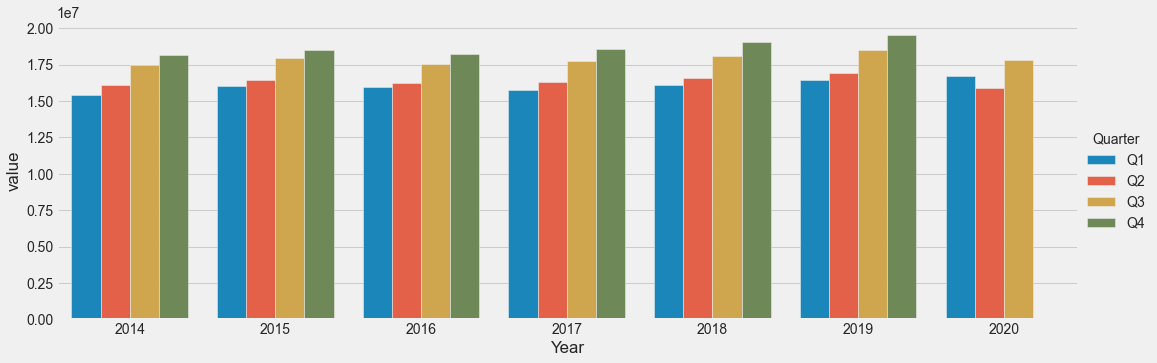

In [67]:
# Plotting the melted GDP values
sns.catplot(x = 'Year', y='value', aspect=3, 
               hue = 'Quarter',data=RealGDP, kind='bar')

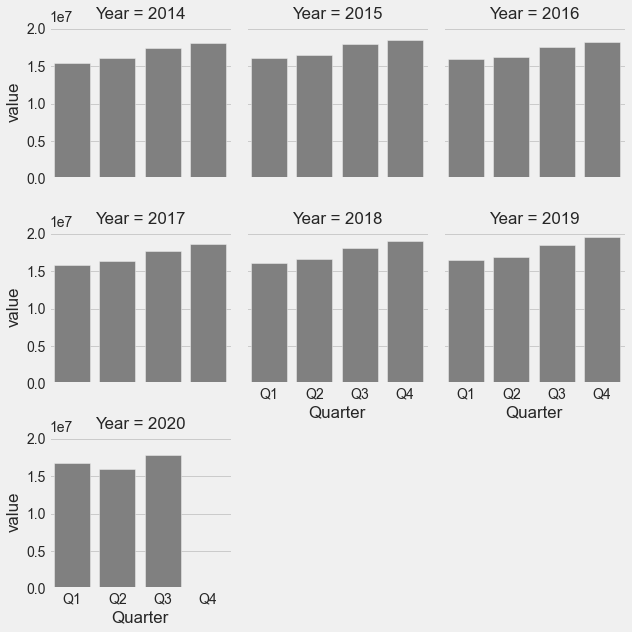

In [68]:
# Subplots with seaborn
g = sns.FacetGrid(RealGDP, col='Year', col_wrap=3)
g.map(sns.barplot, 'Quarter', 'value', color=".5")

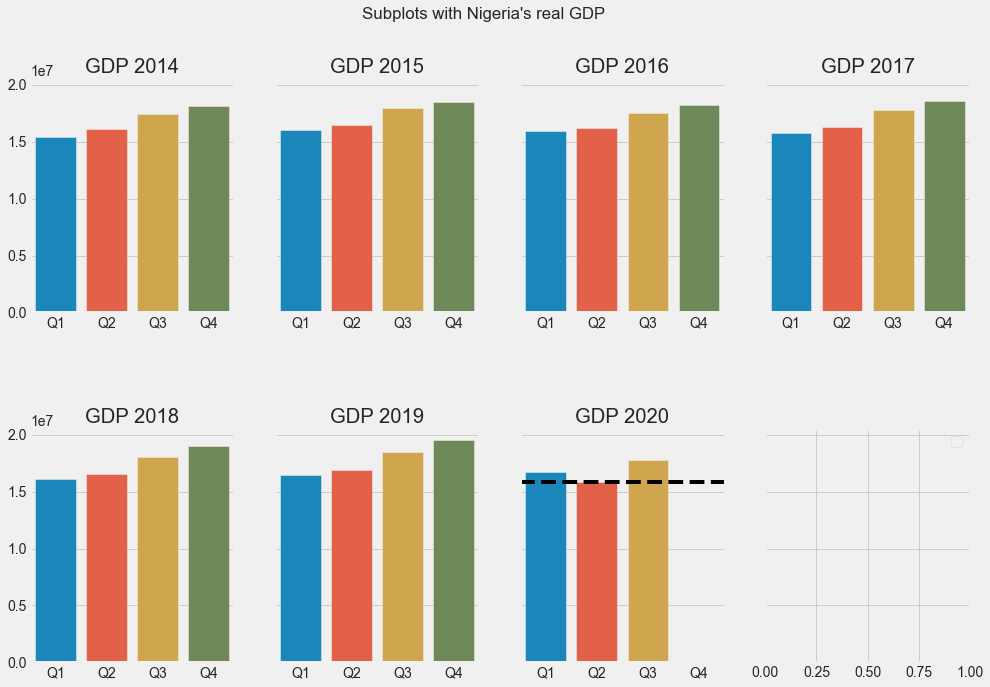

In [69]:
df = realGDP.set_index('Year')
a = df.loc[2014]
b = df.loc[2015]
c = df.loc[2016]
d = df.loc[2017]
e = df.loc[2018]
f = df.loc[2019]
g = df.loc[2020]

fig, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)
fig.suptitle('Subplots with Nigeria\'s real GDP')

sns.barplot(ax=axes[0, 0], x=a.index, y=a.values)
axes[0, 0].set_title('GDP 2014')

sns.barplot(ax=axes[0, 1], x=b.index, y=b.values)
axes[0, 1].set_title('GDP 2015')

sns.barplot(ax=axes[0, 2], x=c.index, y=c.values)
axes[0, 2].set_title('GDP 2016')

sns.barplot(ax=axes[0, 3], x=d.index, y=d.values)
axes[0, 3].set_title('GDP 2017')

sns.barplot(ax=axes[1, 0], x=e.index, y=e.values)
axes[1, 0].set_title('GDP 2018')

sns.barplot(ax=axes[1, 1], x=f.index, y=f.values)
axes[1, 1].set_title('GDP 2019')

sns.barplot(ax=axes[1, 2], x=g.index, y=g.values)
axes[1, 2].set_title('GDP 2020')
axes[1, 2].axhline(15890000, color='black', ls='--')

plt.subplots_adjust(hspace=0.5)
plt.legend('lower left')